In [139]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy.oauth2 import SpotifyOAuth

## **Configuration de l'API Spotify**

In [147]:

# Configurer l'authentification avec Spotipy
sp = Spotify(auth_manager=SpotifyOAuth(
    client_id=os.getenv('SPOTIPY_CLIENT_ID'),
    client_secret=os.getenv('SPOTIPY_CLIENT_SECRET'),
    redirect_uri=os.getenv('SPOTIPY_REDIRECT_URI'),
    scope="playlist-read-private"
))

# Test de la connexion en recherchant une playlist
results = sp.search(q="Top Hits", type="playlist", limit=1)
for playlist in results['playlists']['items']:
    print("Playlist Name:", playlist['name'])
    print("Playlist ID:", playlist['id'])


Playlist Name: Top Hits de 2006
Playlist ID: 37i9dQZF1DX5c42vvWQbfU


## **Récupération des playlists annuellles**

In [150]:
years = ["2019", "2020", "2021", "2022", "2023"]
playlists = []

for year in years:
    results = sp.search(q=f"Top Hits {year}", type="playlist", limit=1)
    for playlist in results['playlists']['items']:
        playlists.append({
            "name": playlist['name'],
            "id": playlist['id'],
            "year": year
        })
        print(f"Playlist Name: {playlist['name']}")
        print(f"Playlist ID: {playlist['id']}")


Playlist Name: Top 50 : France
Playlist ID: 37i9dQZEVXbIPWwFssbupI
Playlist Name: Hits Français 2020
Playlist ID: 37i9dQZF1DWVAWlq3l00p0
Playlist Name: EDM Music 2024 (Top 100)
Playlist ID: 2e3dcRuo9uDH6qD3NOGKAL
Playlist Name: Hot Hits USA
Playlist ID: 37i9dQZF1DX0kbJZpiYdZl
Playlist Name: BEST HITS 2024 🔥 Popular Songs 🎵 Top Music Hits 🎵 
Playlist ID: 5KJDMJe9EJ7QRz8FG2MIpI


## **Extraction des informations sur les morceaux (tracks) pour chaque playlist**

Structure des informations à extraire: 

- Tracks : nom du morceau, nom de l’album, date de sortie de l’album, durée du morceau, popularité du morceau
- Artistes : nom de l’artiste, nombre de followers, genres associés à l’artiste, popularité de l’artiste

In [154]:
tracks_data = []

for playlist in playlists:
    playlist_id = playlist['id']
    results = sp.playlist_tracks(playlist_id)
    for item in results['items']:
        track = item['track']
        artist = track['artists'][0]  # Utilise le premier artiste comme principal
        
        # Informations sur le morceau
        track_info = {
            "playlist_year": playlist['year'],
            "track_name": track['name'],
            "album_name": track['album']['name'],
            "album_release_date": track['album']['release_date'],
            "track_duration_ms": track['duration_ms'],
            "track_popularity": track['popularity'],
            "artist_name": artist['name'],
            "artist_id": artist['id']
        }
        
        # Récupérer les informations supplémentaires sur l'artiste
        artist_info = sp.artist(artist['id'])
        track_info.update({
            "artist_followers": artist_info['followers']['total'],
            "artist_genres": artist_info['genres'],
            "artist_popularity": artist_info['popularity']
        })
        
        tracks_data.append(track_info)

# Afficher les premiers résultats pour vérification
for track in tracks_data[:5]:
    print(track)


{'playlist_year': '2019', 'track_name': 'CARTIER SANTOS', 'album_name': 'A LA VIE A LA MORT', 'album_release_date': '2024-09-26', 'track_duration_ms': 183813, 'track_popularity': 79, 'artist_name': 'SDM', 'artist_id': '0LKAV3zJ8a8AIGnyc5OvfB', 'artist_followers': 1333635, 'artist_genres': ['french hip hop', 'pop urbaine', 'r&b francais'], 'artist_popularity': 81}
{'playlist_year': '2019', 'track_name': 'POUR ELLE', 'album_name': 'A LA VIE A LA MORT', 'album_release_date': '2024-09-26', 'track_duration_ms': 179034, 'track_popularity': 79, 'artist_name': 'SDM', 'artist_id': '0LKAV3zJ8a8AIGnyc5OvfB', 'artist_followers': 1333635, 'artist_genres': ['french hip hop', 'pop urbaine', 'r&b francais'], 'artist_popularity': 81}
{'playlist_year': '2019', 'track_name': 'Ca parle mal', 'album_name': 'Depuis le temps (Part. 2)', 'album_release_date': '2024-06-21', 'track_duration_ms': 176248, 'track_popularity': 76, 'artist_name': 'Bouss', 'artist_id': '3hWQDRr1PqwvnHeiZlucBq', 'artist_followers': 90

## **Enregistrement des données**

In [157]:
import pandas as pd

# Convertir les données en DataFrame
df_tracks = pd.DataFrame(tracks_data)

# Sauvegarder dans un fichier CSV dans le dossier data
df_tracks.to_csv("../data/spotify_top_hits_data.csv", index=False)


# Afficher un aperçu des données pour vérification
df_tracks.head()


,playlist_year,track_name,album_name,album_release_date,track_duration_ms,track_popularity,artist_name,artist_id,artist_followers,artist_genres,artist_popularity
0,2019,CARTIER SANTOS,A LA VIE A LA MORT,2024-09-26,183813,79,SDM,0LKAV3zJ8a8AIGnyc5OvfB,1333635,"[french hip hop, pop urbaine, r&b francais]",81
1,2019,POUR ELLE,A LA VIE A LA MORT,2024-09-26,179034,79,SDM,0LKAV3zJ8a8AIGnyc5OvfB,1333635,"[french hip hop, pop urbaine, r&b francais]",81
2,2019,Ca parle mal,Depuis le temps (Part. 2),2024-06-21,176248,76,Bouss,3hWQDRr1PqwvnHeiZlucBq,90323,[],72
3,2019,SOIS PAS TIMIDE,LE NORD SE SOUVIENT,2024-09-13,165978,71,GIMS,0GOx72r5AAEKRGQFn3xqXK,5017132,"[french hip hop, pop urbaine, r&b francais, ra...",80
4,2019,Sous la lune,Rien 100 Rien,2019-06-28,171000,61,Jul,3IW7ScrzXmPvZhB27hmfgy,10483008,"[french hip hop, pop urbaine, rap marseille]",82


## **Analyse et Visualisations**

### Popularité d'un artiste et le nombre de followers 

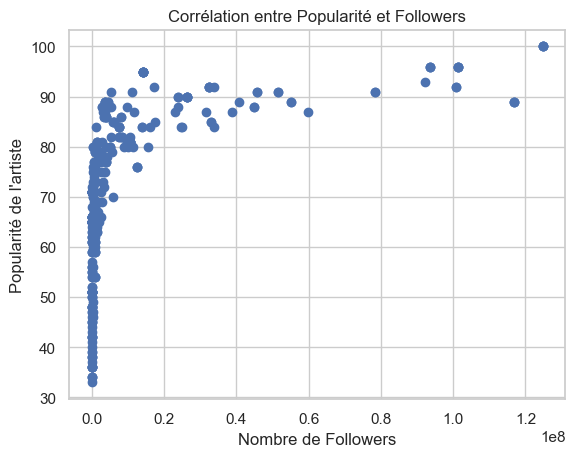

In [161]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df_tracks['artist_followers'], df_tracks['artist_popularity'])
plt.xlabel('Nombre de Followers')
plt.ylabel('Popularité de l\'artiste')
plt.title('Corrélation entre Popularité et Followers')
plt.show()


On peut observer dans ce graphique que la plupart des points se concentrent dans la région de faible nombre de followers, avec une popularité qui varie, mais reste souvent élevée (au-dessus de 50). Cela peut nous indiquer que les artistes populaires sur spotify peuvent ne pas nécessairement avoir un nombre de followers très élevé.
- **Disparité de la relation followers/popularité**: Il est probable que la popularité de l'artiste, mesurée ici par Spotify, n'est pas toujours proportionnelle à son nombre de followers. Cela peut être dû au fait que certains artistes peuvent avoir un ou plusieurs hits sans avoir une base de fans très fidèle qui les suit spécifiquement.La popularité d'un artiste sur Spotify peut aussi dépendre de facteurs comme la fréquence de mise en avant par des playlists ou la viralité de certains morceaux, au-delà de sa base de fans.
- **Effet de découverte ou de succès viral**: Certains artistes peuvent devenir populaires de manière virale, ou être ajoutés à des playlists populaires, ce qui peut booster leur popularité sans pour autant leur amener un grand nombre de followers. Ce phénomène pourrait expliquer pourquoi la popularité reste élevée même avec peu de followers.

### Popularité de l'artiste et la popularité du track

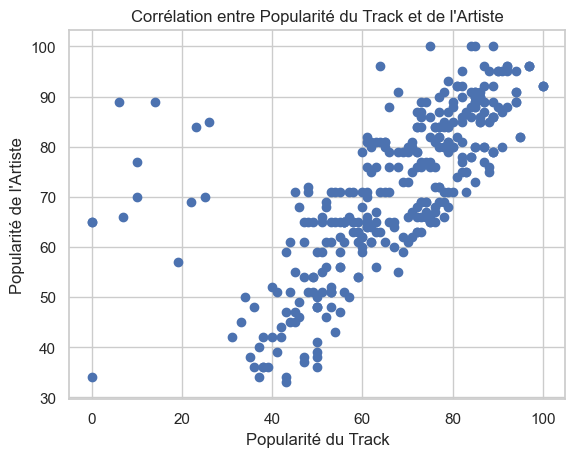

In [165]:
plt.scatter(df_tracks['track_popularity'], df_tracks['artist_popularity'])
plt.xlabel('Popularité du Track')
plt.ylabel('Popularité de l\'Artiste')
plt.title('Corrélation entre Popularité du Track et de l\'Artiste')
plt.show()


Ce graphique montre une tendance positive plus marquée, avec un regroupement des points le long du diagonale. Il peut nous indiquer que les artistes ayant des morceaux populaires tendent aussi à avoir une popularité élevée.

- **Impact direct des hits** : La forte corrélation visuelle entre la popularité des morceaux et celle de l’artiste pourrait indiquer que les "hits" jouent un rôle clé dans l’algorithme de popularité de Spotify. Si un morceau devient très populaire, l'artiste en bénéficie immédiatement en termes de visibilité et de popularité.

- **Rôle des playlists** : Cette relation peut aussi être renforcée par les playlists Spotify : les morceaux ajoutés à des playlists très suivies peuvent rapidement augmenter la popularité à la fois de la piste et de l’artiste.

In [168]:
# Calcul des coefficients de corrélation
correlation_followers_popularity = df_tracks['artist_followers'].corr(df_tracks['artist_popularity'])
correlation_track_popularity_artist_popularity = df_tracks['track_popularity'].corr(df_tracks['artist_popularity'])

print("Corrélation entre Popularité de l'Artiste et Nombre de Followers:", correlation_followers_popularity)
print("Corrélation entre Popularité de l'Artiste et Popularité du Track:", correlation_track_popularity_artist_popularity)



Corrélation entre Popularité de l'Artiste et Nombre de Followers: 0.544422232391895
Corrélation entre Popularité de l'Artiste et Popularité du Track: 0.6959716171108413


En caclulant les coefficients de corrélation, on peut en déduire que:
- La popularité des morceaux est le facteur le plus déterminant de la popularité de l'artiste sur Spotify. Les artistes devraient concentrer leurs efforts sur la production de morceaux attractifs pour maximiser leur popularité.
- Le nombre de followers joue également un rôle mais reste un indicateur moins influent que la popularité des morceaux, comme le confirme la corrélation plus modérée.

## **Evolution des genres de 2019 à 2023**

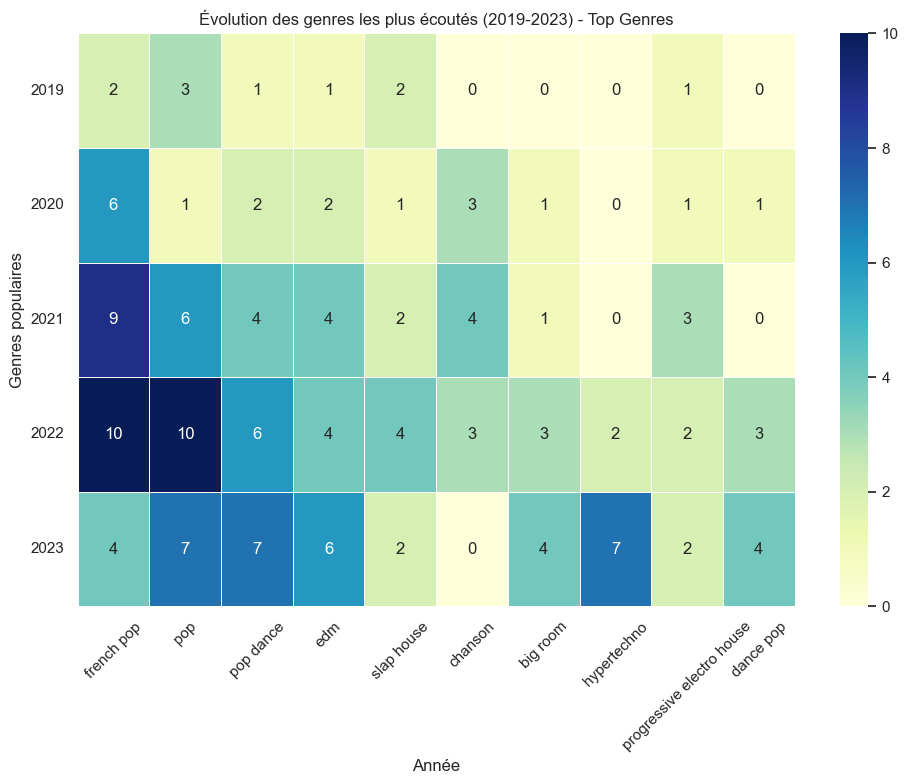

In [172]:

# Extraire l'année de la date de sortie de l'album
df_tracks['year'] = pd.to_datetime(df_tracks['album_release_date']).dt.year

# Filtrer les années de 2019 à 2023
df_filtered = df_tracks[(df_tracks['year'] >= 2019) & (df_tracks['year'] <= 2023)]

# Séparer les genres multiples
df_filtered.loc[:, 'artist_genres'] = df_filtered['artist_genres'].apply(lambda x: x if isinstance(x, list) else eval(x))

df_exploded = df_filtered.explode('artist_genres')

# Compter les occurrences de chaque genre par année
genre_counts = df_exploded.groupby(['year', 'artist_genres']).size().unstack(fill_value=0)

# Sélectionner les 10 genres les plus fréquents
top_genres = genre_counts.sum().nlargest(10).index
genre_counts_top = genre_counts[top_genres]

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(genre_counts_top, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Évolution des genres les plus écoutés (2019-2023) - Top Genres")
plt.xlabel("Année")
plt.ylabel("Genres populaires")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


En observant ce heatmap, on peut observer que :

- Le genre french pop domine en termes de présence au fil des années, particulièrement en 2021 et 2022, ce qui indique une tendance à la hausse dans sa popularité.
- Les genres pop et pop dance montrent également une popularité persistante, mais avec des variations d'une année à l'autre.
- On observe une montée en popularité du genre slap house à partir de 2020, avec un pic en 2022, ce qui peut suggérer une tendance temporaire ou un genre en phase ascendante.

En revanche, certains genres comme big room et chanson ont une présence plus discrète, indiquant peut-être une popularité plus stable mais moins dominante.

Le heatmap permet de visualiser d’un coup d'œil les genres les plus constants par leurs teintes foncées sur plusieurs années. Par exemple, pop et french pop se démarquent comme genres populaires constants.
Les teintes plus claires dans les autres cases indiquent des genres qui apparaissent de manière sporadique ou qui sont moins populaires.

## **Distribution de la popularité des morceaux** 

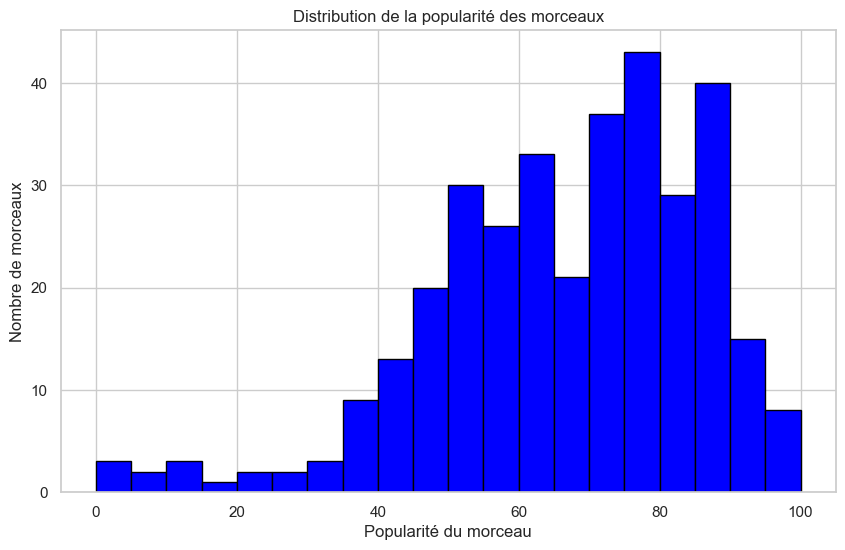

In [176]:

# Tracer l'histogramme de la popularité des morceaux
plt.figure(figsize=(10, 6))
plt.hist(df_tracks['track_popularity'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution de la popularité des morceaux")
plt.xlabel("Popularité du morceau")
plt.ylabel("Nombre de morceaux")
plt.show()


La plupart des morceaux dans cette base ont une popularité assez élevée (entre 60 et 90 sur une échelle de 0 à 100).

Il y a très peu de morceaux qui ont une popularité faible (en dessous de 30), ce qui pourrait signifier qu'ils sont soit moins connus, soit moins aimés.

On voit un grand nombre de morceaux avec une popularité élevée (vers 70-90), donc ce sont probablement des hits ou des morceaux appréciés par beaucoup de gens.

On peut conclure que cette collection de morceaux contient surtout des morceaux populaires que beaucoup de gens écoutent.

## **Les 10 Artistes les Plus Populaires par Popularité Moyenne des Morceaux**

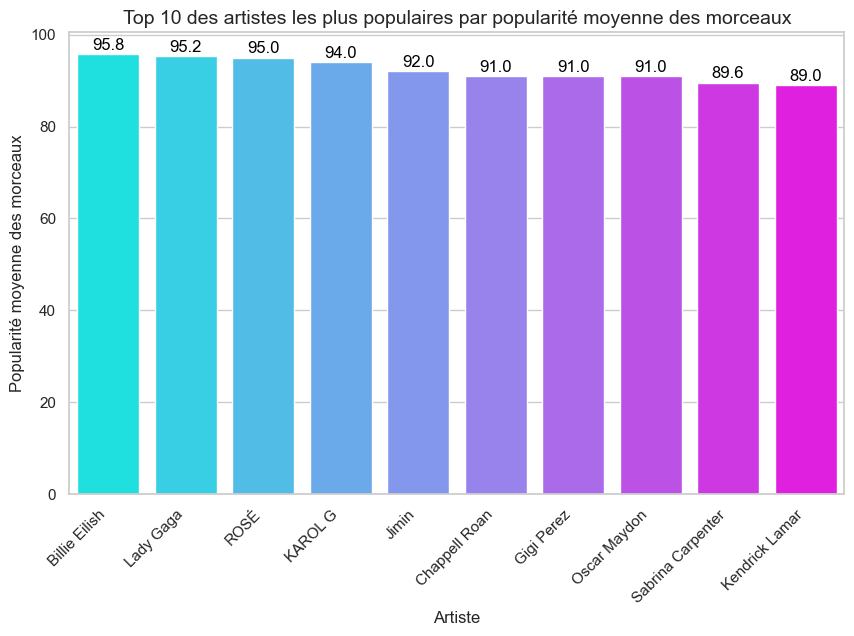

In [180]:

# Configurer le style du graphique avec un fond de grille blanche
sns.set(style="whitegrid")
# Créer une figure et un axe avec une taille spécifique
fig, ax = plt.subplots(figsize=(10, 6))

# Ajouter une colonne temporaire pour `hue` afin d'utiliser une palette sans créer de légende
# Cela permet de colorer chaque barre différemment sans afficher de légende superflue
top_artistes_popularity['temp_hue'] = top_artistes_popularity.index
# Tracer le graphique en barres en utilisant une palette de couleurs personnalisée
ax = sns.barplot(x='artist_name', y='track_popularity', data=top_artistes_popularity, hue='temp_hue', palette='cool', dodge=False, legend=False)

# Ajouter des étiquettes de valeurs au-dessus de chaque barre pour indiquer la popularité
for index, value in enumerate(top_artistes_popularity['track_popularity']):
    ax.text(index, value + 1, round(value, 1), color='black', ha="center")

# Ajouter un titre et des labels d'axe pour plus de clarté
plt.title("Top 10 des artistes les plus populaires par popularité moyenne des morceaux", fontsize=14)
plt.xlabel("Artiste", fontsize=12)
plt.ylabel("Popularité moyenne des morceaux", fontsize=12)
# Incliner les noms des artistes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha="right")

# Supprimer la colonne temporaire `temp_hue` pour éviter de la garder dans le DataFrame
top_artistes_popularity.drop(columns='temp_hue', inplace=True)

# Afficher le graphique
plt.show()


Ce graphique montre les 10 artistes avec les morceaux les plus populaires en moyenne. Les barres montrent que des artistes comme Billie Eilish et Lady Gaga ont une popularité très élevée pour leurs chansons, ce qui indique qu'ils sont largement écoutés et appréciés. Les scores sont tous proches, montrant que ces artistes ont un succès assez uniforme et élevé auprès du public.

In [183]:
# Convertir les listes de genres en chaînes de caractères pour éviter les problèmes de duplication
df_tracks['artist_genres_str'] = df_tracks['artist_genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

# Filtrer les données pour les artistes les plus populaires
top_artists = top_artistes_popularity['artist_name'].tolist()
top_artists_genres = df_tracks[df_tracks['artist_name'].isin(top_artists)][['artist_name', 'artist_genres_str']].drop_duplicates()

# Afficher les résultats
for artist in top_artists:
    genres = top_artists_genres[top_artists_genres['artist_name'] == artist]['artist_genres_str'].values
    print(f"{artist}: {genres}")


Billie Eilish: ['art pop, pop']
Lady Gaga: ['art pop, dance pop, pop']
ROSÉ: ['k-pop']
KAROL G: ['reggaeton, reggaeton colombiano, urbano latino']
Jimin: ['k-pop']
Chappell Roan: ['indie pop']
Gigi Perez: ['bedroom pop']
Oscar Maydon: ['corrido']
Sabrina Carpenter: ['pop']
Kendrick Lamar: ['conscious hip hop, hip hop, rap, west coast rap']
